### **Jensen’s Inequality and ELBO in Variational Autoencoders**

We will visualize **Jensen’s inequality** and how it gives rise to the **ELBO (Evidence Lower Bound)** in Variational Autoencoders.  
Even a beginner can understand why:

$$
\text{ELBO} \le \log p_\theta(x)
$$

---

### **Concept**

1️⃣ **Log-likelihood of data:**

$$
\log p_\theta(x) = \log \int p_\theta(x,z) \, dz
$$

---

2️⃣ **Introduce a distribution \( q_\phi(z|x) \):**

$$
\log p_\theta(x)
= \log \int q_\phi(z|x) \frac{p_\theta(x,z)}{q_\phi(z|x)} \, dz
$$

---

3️⃣ **Apply Jensen’s inequality:**

$$
\log \mathbb{E}_{q_\phi(z|x)}\Bigg[\frac{p_\theta(x,z)}{q_\phi(z|x)}\Bigg]
\ge
\mathbb{E}_{q_\phi(z|x)}\Bigg[\log \frac{p_\theta(x,z)}{q_\phi(z|x)}\Bigg]
$$

- **Left:** True **log-likelihood**  
- **Right:** **ELBO** (lower bound)  

---

4️⃣ **Connecting to ELBO**

The **gap** between the true log-likelihood and the ELBO is the **KL divergence**:

$$
\log p_\theta(x)
= \text{ELBO} + KL\big(q_\phi(z|x) \,\|\, p_\theta(z|x)\big)
$$

- KL divergence \( \ge 0 \)  
- Therefore, **ELBO is always a lower bound**  

---

**✅ Intuition:**  
- ELBO is a **safe estimate** of log-likelihood.  
- As \( q_\phi(z|x) \to p_\theta(z|x) \), **ELBO → log-likelihood**.


## Step 1 – Install and Import

In [3]:
# !pip install jax matplotlib numpy --quiet

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np


## Step 2 -  Define a Simple Example for Jensen’s Inequality

In [4]:
key = jax.random.PRNGKey(0)

# Simulate 1000 samples from a positive random variable
Y = jax.random.uniform(key, (1000,), minval=0.01, maxval=2.0)

lhs = jnp.log(jnp.mean(Y))      # log(E[Y])
rhs = jnp.mean(jnp.log(Y))      # E[log Y]

print("log(E[Y]) =", lhs)
print("E[log(Y)] =", rhs)
print("Jensen gap (ELBO difference) =", lhs - rhs)


log(E[Y]) = 0.011017324
E[log(Y)] = -0.27278835
Jensen gap (ELBO difference) = 0.28380567


## Step 3 – Visualize Jensen’s Inequality

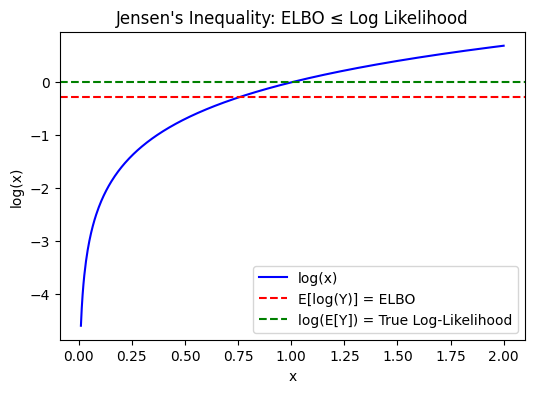

In [5]:
x = np.linspace(0.01, 2.0, 500)
y = np.log(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='log(x)', color='blue')
plt.axhline(rhs, color='red', linestyle='--', label='E[log(Y)] = ELBO')
plt.axhline(lhs, color='green', linestyle='--', label='log(E[Y]) = True Log-Likelihood')
plt.title("Jensen's Inequality: ELBO ≤ Log Likelihood")
plt.xlabel("x")
plt.ylabel("log(x)")
plt.legend()
plt.show()


## **Step 4 – Connect to ELBO**

**True log-likelihood:**

$$
\log p_\theta(x)
= \log \mathbb{E}_{q(z|x)} \Bigg[ \frac{p_\theta(x,z)}{q(z|x)} \Bigg]
$$

---

**Evidence Lower Bound (ELBO):**

$$
\text{ELBO}
= \mathbb{E}_{q(z|x)} \Big[ \log p_\theta(x,z) - \log q(z|x) \Big]
$$

---

**The gap between them:**

$$
\log p_\theta(x) - \text{ELBO}
= KL\big(q(z|x) \,\|\, p_\theta(z|x)\big) \ge 0
$$

---

✅ **Intuition:**  
- ELBO is **always less than or equal to** the true log-likelihood.  
- The difference is the **KL divergence**, which is always non-negative.  
- Therefore:

$$
\text{ELBO} \le \log p_\theta(x)
$$

This **visually proves** that ELBO is a **lower bound** due to **Jensen’s inequality**.


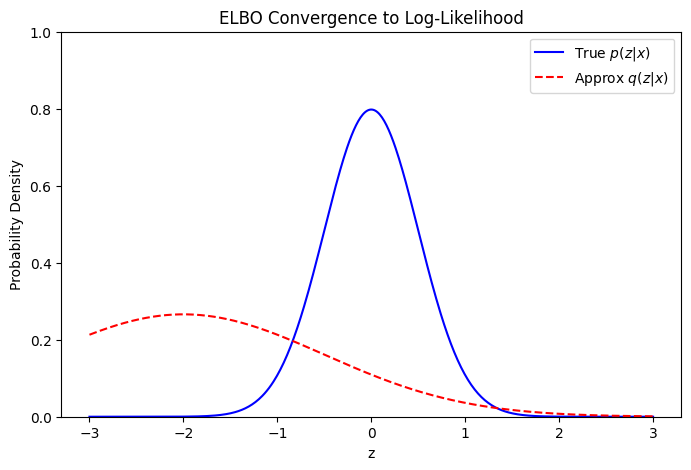

In [11]:
# Step 0: Setup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ensure nice rendering
plt.rcParams["figure.figsize"] = (8,5)

# Step 1: Define the "true" target distribution p(z|x)
# We'll simulate with a Normal distribution
true_mean = 0.0
true_std = 0.5

z = np.linspace(-3, 3, 500)
p_zx = 1/(np.sqrt(2*np.pi*true_std**2)) * np.exp(-(z-true_mean)**2/(2*true_std**2))

# Step 2: Define an initial approximate q(z|x)
# We'll start with a bad approximation (shifted and wider)
approx_mean = -2.0
approx_std = 1.5

# Step 3: Prepare the figure for animation
fig, ax = plt.subplots()
ax.set_title("ELBO Convergence to Log-Likelihood")
ax.set_xlabel("z")
ax.set_ylabel("Probability Density")

# Plot target distribution
line_p, = ax.plot(z, p_zx, 'b-', label='True $p(z|x)$')
line_q, = ax.plot(z, 1/(np.sqrt(2*np.pi*approx_std**2)) * np.exp(-(z-approx_mean)**2/(2*approx_std**2)),
                  'r--', label='Approx $q(z|x)$')

text_info = ax.text(0.02, 0.95, '', transform=ax.transAxes)

ax.legend()
ax.set_ylim(0, 1.0)

# Step 4: Animation update function
def update(frame):
    global approx_mean, approx_std
    # Gradually move q(z|x) to p(z|x)
    approx_mean = -2 + 2*frame/50   # shift towards 0
    approx_std = 1.5 - 1.0*frame/50 # shrink towards 0.5

    q_zx = 1/(np.sqrt(2*np.pi*approx_std**2)) * np.exp(-(z-approx_mean)**2/(2*approx_std**2))
    line_q.set_ydata(q_zx)

    # Compute "ELBO" as E_q[log p/q] ~ -KL(q||p) + log-likelihood
    kl = np.sum(q_zx * np.log(q_zx/(p_zx+1e-8)+1e-8)) * (z[1]-z[0])
    log_px = np.log(np.trapz(p_zx, z))  # normalized likelihood ~ 0
    elbo = log_px - kl

    text_info.set_text(f"Frame {frame}\nKL ≈ {kl:.3f}\nELBO ≈ {elbo:.3f}")
    return line_q, text_info

# Step 5: Create animation
ani = FuncAnimation(fig, update, frames=51, interval=200, blit=False)
plt.show()
